# House Price Prediction Regression - TensorFlow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

## Importing the Data

In [29]:
df = pd.read_csv('house_data.csv') 
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [30]:
print(convert_label_actual(-0.339584))

13559


In [31]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [32]:
df.shape

(5000, 7)

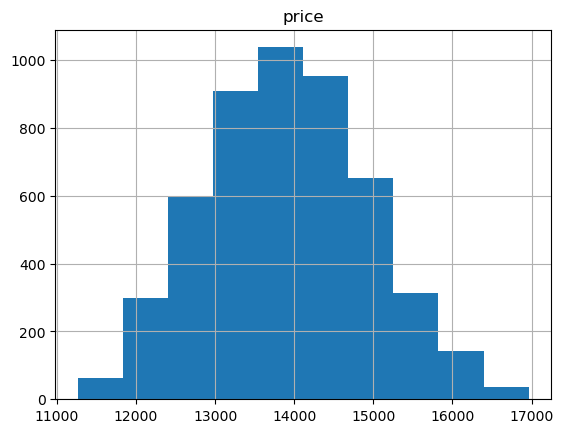

In [33]:
df.hist("price")
plt.show()

## Check Missing Values

In [34]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [35]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

## Data Normalization

In [36]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## Select X Labels

In [37]:
X = df_norm.iloc[:, :5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


## Select Y Labels

In [38]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## Feature and Label Values

In [39]:
X_arr = X.values
Y_arr = Y.values

In [40]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [41]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

## Train and Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state=1)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


## Create the Model

In [43]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [44]:
model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                60        
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 5)                 105       
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

In [45]:
model = get_model()

# this prediction is before training the model
preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [46]:
# Train model and store in the object history
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000
)

Epoch 1/1000
155/155 [==============================] - 1s 2ms/step - loss: 1.3322 - val_loss: 0.7513
Epoch 2/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.3275 - val_loss: 0.7491
Epoch 3/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.3231 - val_loss: 0.7469
Epoch 4/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.3189 - val_loss: 0.7448
Epoch 5/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.3147 - val_loss: 0.7427
Epoch 6/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.3107 - val_loss: 0.7406
Epoch 7/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.3068 - val_loss: 0.7386
Epoch 8/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.3029 - val_loss: 0.7366
Epoch 9/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.2990 - val_loss: 0.7347
Epoch 10/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.295

155/155 [==============================] - 0s 1ms/step - loss: 1.0824 - val_loss: 0.6304
Epoch 81/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0800 - val_loss: 0.6293
Epoch 82/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0777 - val_loss: 0.6283
Epoch 83/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0754 - val_loss: 0.6273
Epoch 84/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0731 - val_loss: 0.6262
Epoch 85/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0708 - val_loss: 0.6252
Epoch 86/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0685 - val_loss: 0.6242
Epoch 87/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0663 - val_loss: 0.6231
Epoch 88/1000
155/155 [==============================] - 0s 2ms/step - loss: 1.0641 - val_loss: 0.6221
Epoch 89/1000
155/155 [==============================] - 0s 1ms/step - loss: 1.0619 - v

155/155 [==============================] - 0s 1ms/step - loss: 0.9341 - val_loss: 0.5645
Epoch 160/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9325 - val_loss: 0.5639
Epoch 161/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9310 - val_loss: 0.5633
Epoch 162/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9295 - val_loss: 0.5628
Epoch 163/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9280 - val_loss: 0.5623
Epoch 164/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9266 - val_loss: 0.5618
Epoch 165/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9251 - val_loss: 0.5613
Epoch 166/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9236 - val_loss: 0.5608
Epoch 167/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9221 - val_loss: 0.5603
Epoch 168/1000
155/155 [==============================] - 0s 1ms/step - loss: 0

Epoch 238/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8284 - val_loss: 0.5253
Epoch 239/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8271 - val_loss: 0.5248
Epoch 240/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8259 - val_loss: 0.5244
Epoch 241/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8246 - val_loss: 0.5239
Epoch 242/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8233 - val_loss: 0.5234
Epoch 243/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8221 - val_loss: 0.5229
Epoch 244/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8208 - val_loss: 0.5224
Epoch 245/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8195 - val_loss: 0.5219
Epoch 246/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.8183 - val_loss: 0.5214
Epoch 247/1000
155/155 [==============================] - 0s 1ms

Epoch 317/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7303 - val_loss: 0.4850
Epoch 318/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7290 - val_loss: 0.4844
Epoch 319/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7278 - val_loss: 0.4838
Epoch 320/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7265 - val_loss: 0.4833
Epoch 321/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7253 - val_loss: 0.4828
Epoch 322/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7240 - val_loss: 0.4822
Epoch 323/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7228 - val_loss: 0.4817
Epoch 324/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7215 - val_loss: 0.4811
Epoch 325/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7203 - val_loss: 0.4806
Epoch 326/1000
155/155 [==============================] - 0s 1ms

Epoch 396/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6322 - val_loss: 0.4410
Epoch 397/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6310 - val_loss: 0.4404
Epoch 398/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6298 - val_loss: 0.4399
Epoch 399/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6286 - val_loss: 0.4393
Epoch 400/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6273 - val_loss: 0.4387
Epoch 401/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6261 - val_loss: 0.4381
Epoch 402/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.6248 - val_loss: 0.4375
Epoch 403/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6236 - val_loss: 0.4369
Epoch 404/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6223 - val_loss: 0.4364
Epoch 405/1000
155/155 [==============================] - 0s 1ms

Epoch 475/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5374 - val_loss: 0.3948
Epoch 476/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5362 - val_loss: 0.3942
Epoch 477/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5351 - val_loss: 0.3936
Epoch 478/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.5339 - val_loss: 0.3930
Epoch 479/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5328 - val_loss: 0.3924
Epoch 480/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5316 - val_loss: 0.3918
Epoch 481/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5304 - val_loss: 0.3912
Epoch 482/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5293 - val_loss: 0.3906
Epoch 483/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5282 - val_loss: 0.3900
Epoch 484/1000
155/155 [==============================] - 0s 1ms

Epoch 554/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4535 - val_loss: 0.3504
Epoch 555/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4525 - val_loss: 0.3499
Epoch 556/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4515 - val_loss: 0.3494
Epoch 557/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4506 - val_loss: 0.3489
Epoch 558/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4496 - val_loss: 0.3484
Epoch 559/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4487 - val_loss: 0.3479
Epoch 560/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4477 - val_loss: 0.3474
Epoch 561/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4468 - val_loss: 0.3470
Epoch 562/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.4459 - val_loss: 0.3465
Epoch 563/1000
155/155 [==============================] - 0s 1ms

Epoch 633/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3863 - val_loss: 0.3152
Epoch 634/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3855 - val_loss: 0.3148
Epoch 635/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3848 - val_loss: 0.3144
Epoch 636/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3841 - val_loss: 0.3140
Epoch 637/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3834 - val_loss: 0.3136
Epoch 638/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3827 - val_loss: 0.3132
Epoch 639/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3820 - val_loss: 0.3128
Epoch 640/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3813 - val_loss: 0.3124
Epoch 641/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3805 - val_loss: 0.3120
Epoch 642/1000
155/155 [==============================] - 0s 1ms

Epoch 712/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3364 - val_loss: 0.2850
Epoch 713/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3359 - val_loss: 0.2847
Epoch 714/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3354 - val_loss: 0.2843
Epoch 715/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3349 - val_loss: 0.2840
Epoch 716/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3343 - val_loss: 0.2836
Epoch 717/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3338 - val_loss: 0.2832
Epoch 718/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3333 - val_loss: 0.2829
Epoch 719/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3328 - val_loss: 0.2825
Epoch 720/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3323 - val_loss: 0.2822
Epoch 721/1000
155/155 [==============================] - 0s 1ms

Epoch 791/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3024 - val_loss: 0.2595
Epoch 792/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3021 - val_loss: 0.2592
Epoch 793/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3018 - val_loss: 0.2589
Epoch 794/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3014 - val_loss: 0.2587
Epoch 795/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3011 - val_loss: 0.2584
Epoch 796/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3007 - val_loss: 0.2581
Epoch 797/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3004 - val_loss: 0.2579
Epoch 798/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3000 - val_loss: 0.2576
Epoch 799/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2997 - val_loss: 0.2574
Epoch 800/1000
155/155 [==============================] - 0s 1ms

Epoch 870/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2793 - val_loss: 0.2403
Epoch 871/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2790 - val_loss: 0.2401
Epoch 872/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2788 - val_loss: 0.2399
Epoch 873/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2786 - val_loss: 0.2397
Epoch 874/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2783 - val_loss: 0.2395
Epoch 875/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2781 - val_loss: 0.2392
Epoch 876/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2778 - val_loss: 0.2390
Epoch 877/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2776 - val_loss: 0.2388
Epoch 878/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2774 - val_loss: 0.2386
Epoch 879/1000
155/155 [==============================] - 0s 1ms

Epoch 949/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2623 - val_loss: 0.2243
Epoch 950/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2622 - val_loss: 0.2241
Epoch 951/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2620 - val_loss: 0.2239
Epoch 952/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2618 - val_loss: 0.2238
Epoch 953/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2616 - val_loss: 0.2236
Epoch 954/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2614 - val_loss: 0.2234
Epoch 955/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2612 - val_loss: 0.2232
Epoch 956/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2610 - val_loss: 0.2230
Epoch 957/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2608 - val_loss: 0.2228
Epoch 958/1000
155/155 [==============================] - 0s 1ms

## Plot Training and Validation Loss

In [55]:
# plot history
plot_loss(history)

NameError: name 'plot_loss' is not defined

## Predictions

In [56]:
# make predictions on the trained model
preds_on_trained = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [57]:
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

NameError: name 'compare_predictions' is not defined

## Convert Label Value

In [58]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_actual(pred):
    return int(pred * y_std + y_mean)

print(convert_label_actual(-1.836486))

12031


## Price Predictions

In [59]:
price_on_untrained = [convert_label_actual(y) for y in preds_on_untrained]
price_on_trained = [convert_label_actual(y) for y in preds_on_trained]
price_y_test = [convert_label_actual(y) for y in y_test]

In [60]:
# plot price predictions
compare_predictions(price_on_untrained, price_on_trained, price_y_test)

NameError: name 'compare_predictions' is not defined